# Experiments on the effect of learning parameters and mechanisms:
- learning rate
- batch size
- use of callbacks

In [1]:
from src import util
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sensor_data_trainval, sequence_ids_trainval, labels_trainval = util.ingest_sensor_data('train.csv', 'train_labels.csv')
sensor_data_test, sequence_ids_test, _ = util.ingest_sensor_data('test.csv')

sensor_data_train, sequence_ids_train, labels_train, sensor_data_val, sequence_ids_val, labels_val = util.validation_split(training_fraction=0.7, sensor_data=sensor_data_trainval, sequence_ids=sequence_ids_trainval, labels=labels_trainval)

(25968, 60, 13) 25968
(12218, 60, 13) 12218


Epoch 1/50
650/650 [==============================] - 9s 10ms/step - loss: 0.6888 - accuracy: 0.5367 - auc: 0.5513 - val_loss: 0.6844 - val_accuracy: 0.5485 - val_auc: 0.5690 - lr: 1.0000e-04
Epoch 2/50
650/650 [==============================] - 6s 9ms/step - loss: 0.6849 - accuracy: 0.5496 - auc: 0.5683 - val_loss: 0.6819 - val_accuracy: 0.5535 - val_auc: 0.5818 - lr: 1.2589e-04
Epoch 3/50
650/650 [==============================] - 6s 9ms/step - loss: 0.6787 - accuracy: 0.5712 - auc: 0.5945 - val_loss: 0.6742 - val_accuracy: 0.5828 - val_auc: 0.6109 - lr: 1.5849e-04
Epoch 4/50
650/650 [==============================] - 6s 9ms/step - loss: 0.6730 - accuracy: 0.5823 - auc: 0.6099 - val_loss: 0.6707 - val_accuracy: 0.5924 - val_auc: 0.6252 - lr: 1.9953e-04
Epoch 5/50
650/650 [==============================] - 6s 9ms/step - loss: 0.6709 - accuracy: 0.5839 - auc: 0.6159 - val_loss: 0.6652 - val_accuracy: 0.6032 - val_auc: 0.6350 - lr: 2.5119e-04
Epoch 6/50
650/650 [========================

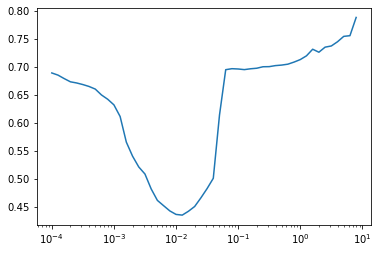

In [4]:
lstm_dim = 64
dense_dim=64
lstm_dropout=0.15

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=lstm_dim, input_shape=(60,13), dropout=lstm_dropout),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    #tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 10))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])


history=model.fit(util.preprocess_sensor_data(sensor_data_trainval), np.array(labels_trainval), validation_split=0.2, epochs=50, callbacks=[lr_schedule])

plt.semilogx(history.history["lr"], history.history["loss"])
#plt.axis([1e-8, 1e-4, 0, 30])
plt.show()

In [ ]:
i

In [5]:
#untuned learning rate for reference 

lstm_dim = 64
dense_dim=64
lstm_dropout=0.15

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=lstm_dim, input_shape=(60,13), dropout=lstm_dropout),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    #tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 10))
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])


history=model.fit(util.preprocess_sensor_data(sensor_data_trainval), np.array(labels_trainval), validation_split=0.2, epochs=50, callbacks=[])


Epoch 1/50
650/650 [==============================] - 8s 10ms/step - loss: 0.6855 - accuracy: 0.5526 - auc: 0.5679 - val_loss: 0.6780 - val_accuracy: 0.5822 - val_auc: 0.6030
Epoch 2/50
650/650 [==============================] - 6s 9ms/step - loss: 0.6730 - accuracy: 0.5812 - auc: 0.6116 - val_loss: 0.6682 - val_accuracy: 0.5947 - val_auc: 0.6386
Epoch 3/50
650/650 [==============================] - 6s 9ms/step - loss: 0.6578 - accuracy: 0.6129 - auc: 0.6457 - val_loss: 0.6721 - val_accuracy: 0.5976 - val_auc: 0.6898
Epoch 4/50
650/650 [==============================] - 6s 9ms/step - loss: 0.6372 - accuracy: 0.6390 - auc: 0.6795 - val_loss: 0.6476 - val_accuracy: 0.6513 - val_auc: 0.7098
Epoch 5/50
650/650 [==============================] - 6s 9ms/step - loss: 0.6132 - accuracy: 0.6668 - auc: 0.7198 - val_loss: 0.5779 - val_accuracy: 0.6954 - val_auc: 0.7670
Epoch 6/50
650/650 [==============================] - 6s 9ms/step - loss: 0.5635 - accuracy: 0.7093 - auc: 0.7800 - val_loss: 0.5

In [ ]:
#tuned learning rate for reference -> diverges

lstm_dim = 64
dense_dim=64
lstm_dropout=0.15

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=lstm_dim, input_shape=(60,13), dropout=lstm_dropout),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    #tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 10))
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])


history=model.fit(util.preprocess_sensor_data(sensor_data_trainval), np.array(labels_trainval), validation_split=0.2, epochs=50, callbacks=[])


In [18]:
#try out callbacks

lstm_dim = 64
dense_dim=64
lstm_dropout=0.15

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=lstm_dim, input_shape=(60,13), dropout=lstm_dropout),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    #tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_auc')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc', min_lr=0.000001,
                        patience=3, mode='max',
                        verbose=1)


checkpoint_filepath = './checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_auc',
    mode='max',
    save_best_only=True, verbose=2)

callbacks = [
    early_stopping,
    reduce_lr,
    model_checkpoint_callback
]

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 10))
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])


history=model.fit(util.preprocess_sensor_data(sensor_data_trainval), np.array(labels_trainval), validation_split=0.2, epochs=80, callbacks=callbacks)
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

pred = model.predict(util.preprocess_sensor_data(sensor_data_test))
util.generate_submission(pred, sequence_ids_test, 'lstm-callbacks')

Epoch 1/80
646/650 [============================>.] - ETA: 0s - loss: 0.6850 - accuracy: 0.5546 - auc: 0.5715
Epoch 1: val_auc improved from -inf to 0.60198, saving model to .\checkpoint
650/650 [==============================] - 8s 11ms/step - loss: 0.6850 - accuracy: 0.5545 - auc: 0.5714 - val_loss: 0.6810 - val_accuracy: 0.5585 - val_auc: 0.6020 - lr: 0.0010
Epoch 2/80
649/650 [============================>.] - ETA: 0s - loss: 0.6778 - accuracy: 0.5685 - auc: 0.5967
Epoch 2: val_auc improved from 0.60198 to 0.63037, saving model to .\checkpoint
650/650 [==============================] - 6s 10ms/step - loss: 0.6778 - accuracy: 0.5685 - auc: 0.5968 - val_loss: 0.6792 - val_accuracy: 0.6034 - val_auc: 0.6304 - lr: 0.0010
Epoch 3/80
649/650 [============================>.] - ETA: 0s - loss: 0.6651 - accuracy: 0.6024 - auc: 0.6334
Epoch 3: val_auc improved from 0.63037 to 0.66095, saving model to .\checkpoint
650/650 [==============================] - 6s 10ms/step - loss: 0.6651 - accura

In [19]:
#try out callbacks

lstm_dim = 64
dense_dim=64
lstm_dropout=0.15

model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=lstm_dim, input_shape=(60,13), dropout=lstm_dropout)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    #tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_auc')

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_auc', min_lr=0.000001,
                        patience=3, mode='max',
                        verbose=1)


checkpoint_filepath = './checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_auc',
    mode='max',
    save_best_only=True, verbose=2)

callbacks = [
    early_stopping,
    reduce_lr,
    model_checkpoint_callback
]

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 10))
optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])


history=model.fit(util.preprocess_sensor_data(sensor_data_trainval), np.array(labels_trainval), validation_split=0.2, epochs=80, callbacks=callbacks)
# The model weights (that are considered the best) are loaded into the model.
model.load_weights(checkpoint_filepath)

pred = model.predict(util.preprocess_sensor_data(sensor_data_test))
util.generate_submission(pred, sequence_ids_test, 'lstm-bidirectional-callbacks')

Epoch 1/80
646/650 [============================>.] - ETA: 0s - loss: 0.6841 - accuracy: 0.5520 - auc: 0.5727
Epoch 1: val_auc improved from -inf to 0.60247, saving model to .\checkpoint
650/650 [==============================] - 12s 14ms/step - loss: 0.6841 - accuracy: 0.5522 - auc: 0.5732 - val_loss: 0.6808 - val_accuracy: 0.5664 - val_auc: 0.6025 - lr: 0.0010
Epoch 2/80
647/650 [============================>.] - ETA: 0s - loss: 0.6729 - accuracy: 0.5834 - auc: 0.6142
Epoch 2: val_auc improved from 0.60247 to 0.65977, saving model to .\checkpoint
650/650 [==============================] - 9s 13ms/step - loss: 0.6729 - accuracy: 0.5833 - auc: 0.6142 - val_loss: 0.6588 - val_accuracy: 0.6178 - val_auc: 0.6598 - lr: 0.0010
Epoch 3/80
647/650 [============================>.] - ETA: 0s - loss: 0.6252 - accuracy: 0.6573 - auc: 0.7071
Epoch 3: val_auc improved from 0.65977 to 0.73545, saving model to .\checkpoint
650/650 [==============================] - 9s 14ms/step - loss: 0.6253 - accur

In [10]:
print(8e-3)

0.008
